In [3]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
# Importing Libraries for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Importing dataset from csv to dataframe

leads = pd.read_csv("Leads.csv")

In [6]:
# Checking if the csv was imported successfully or not

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
# Checking the shape-

leads.shape

(9240, 37)

In [9]:
# Checking info for all the columns of dataframe

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### We can observe that there are some columns with null values and also there are some categorical columns for which we might need to create dummy variables

In [10]:
# Checking stats for various columns

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Cheching for duplicate values based on their Lead Number and Prospect ID

In [11]:
sum(leads.duplicated(subset = 'Lead Number')) == sum(leads.duplicated(subset = 'Prospect ID')) == 0

True

Therefore there are no duplicate enteries 

## Data Cleaning & EDA

In [13]:
# Dropping Prospect ID and lead Number as they dont provide any insights 

leads.drop(['Prospect ID', 'Lead Number'], axis = 1, inplace = True)

In [15]:
leads.shape

(9240, 35)

In [16]:
leads.head(5)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


There are few columns with category called 'Select' which implies that the customer did not selected the option for that particular column. Hence, these can be treated as Nan

In [18]:
# Replacing 'Select' with nan

leads = leads.replace('Select', np.nan)

In [19]:
# Checking for total number of null values for each column

leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [22]:
# Checking the percentage of null values for each column

round((leads.isnull().sum()/len(leads.index))*100, 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [26]:
# Dropping columns with more than 40% null values

columns = leads.columns
dropped_columns= []
for column in columns:
    if(((leads[column].isnull().sum()/len(leads.index)))*100 >= 40):
        leads.drop(column, axis = 1, inplace = True)
        dropped_columns.append(column)

In [28]:
# Dropped columns

dropped_columns

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [29]:
# Checking the percentage of null values for each column after dropping the columns

round((leads.isnull().sum()/len(leads.index))*100, 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [33]:
# Checking for unique values present for each column

for col in leads.select_dtypes(include='object'):
  print(leads[col].value_counts(normalize=True))

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64
Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Social Media         0.000217
Live Chat            0.000217
youtubechannel       0.000109
testone              0.000109
Pay per Click Ads    0.000109
welearnblog_Home     0.000109
WeLearn              0.000109
blog                 0.000109
NC_EDM               0.000109
Name: Lead Source, dtype: float64
No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64
No     0.999784
Yes    0.000216
Name: Do Not Call, dtyp

In [41]:
# Dropping columns which have imbalanced data

columns_to_drop = ['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
                  'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
                  'Get updates on DM Content','I agree to pay the amount through cheque']


In [69]:
leads.dtypes

Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                                          object
Newspaper Article                                 object
X Education Forums                                object
Newspaper                      

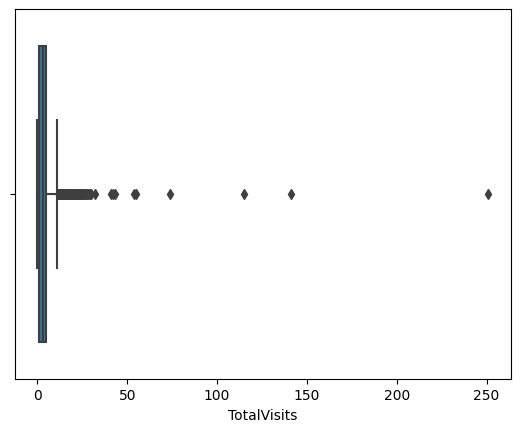

In [78]:
num_cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
# Plotting graphs for numeric columns
# Plotting graph for TotalVisits
sns.boxplot(x = leads['TotalVisits'])
plt.show()

It is observed that there are some outliers in Total Visits

[]

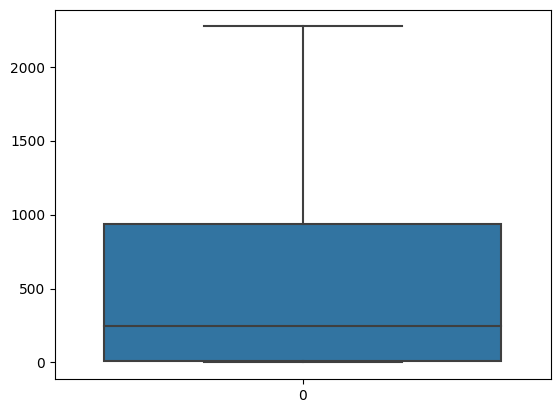

In [79]:
# Plotting graph for Total Time Spent on Website
sns.boxplot(leads['Total Time Spent on Website'])
plt.plot()

There are no outliers in Total Time Spent on Website column

[]

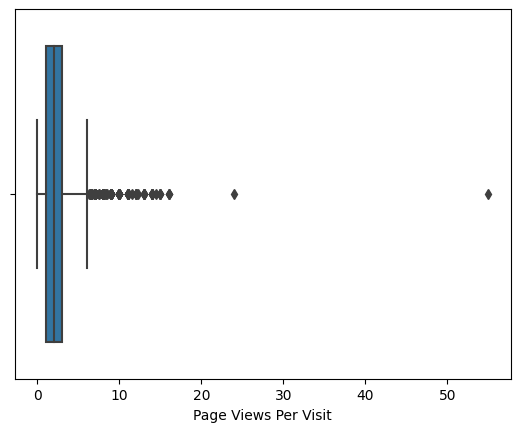

In [82]:
# Plotting graph for Page Views Per Visit
sns.boxplot(x = leads['Page Views Per Visit'])
plt.plot()

There are outliers present in Page Views Per Visit column

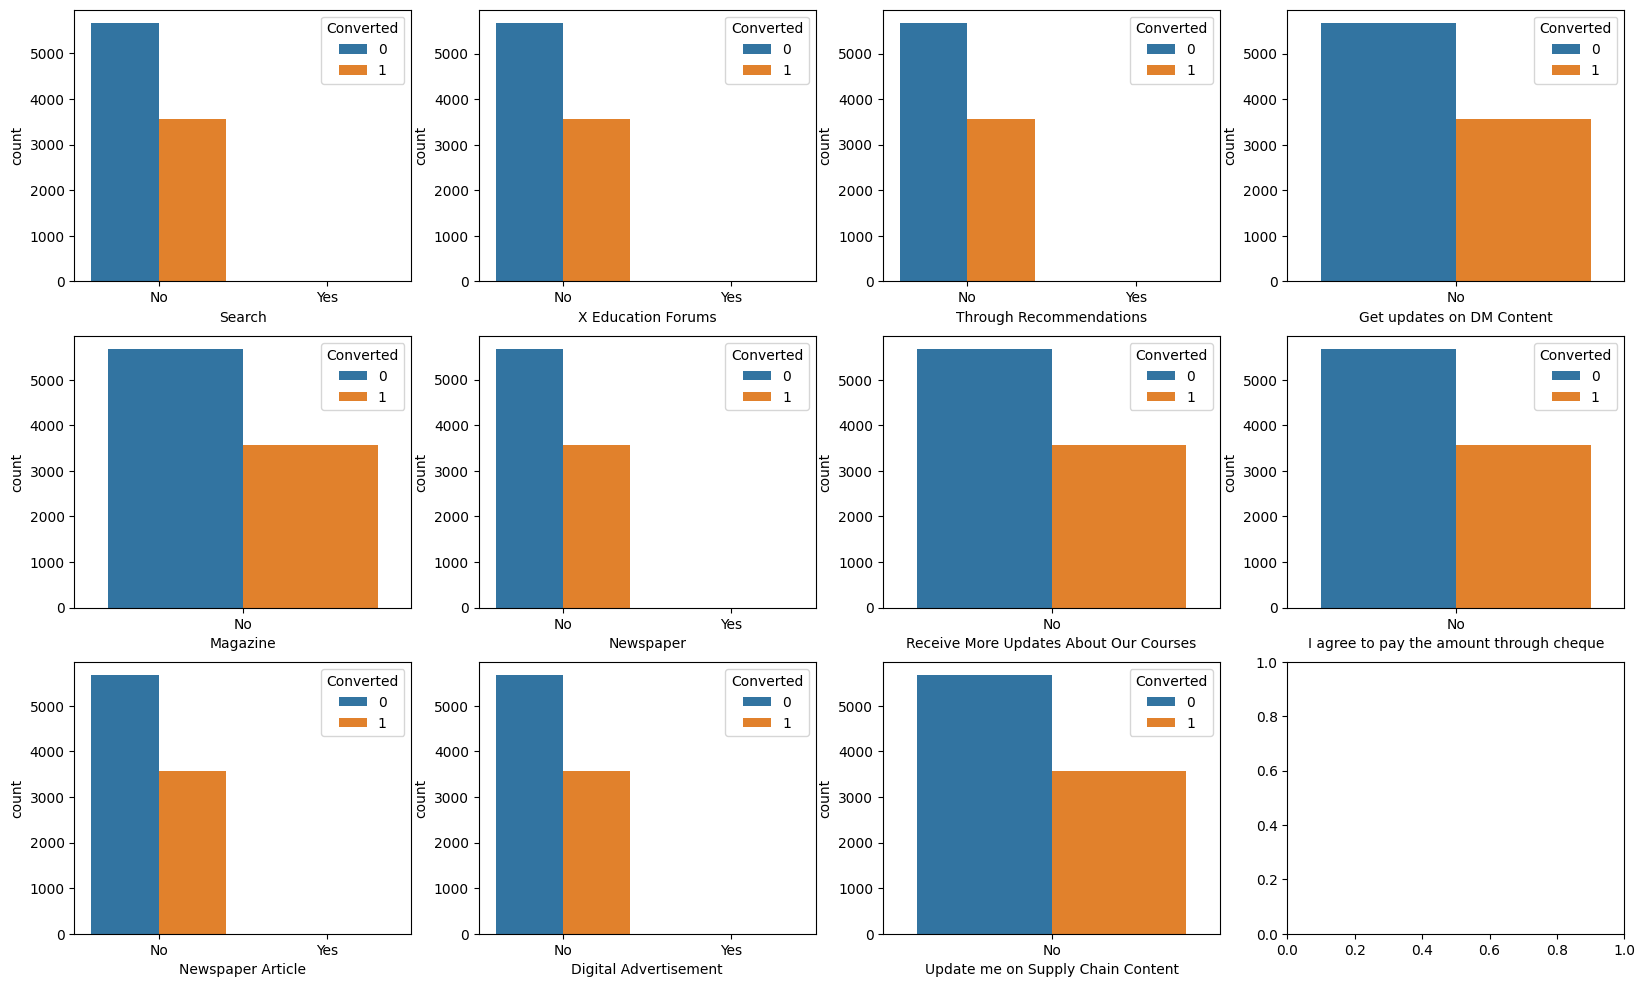

In [42]:
# Plotting graph to confirm that these columns are imbalanced
fig, axis = plt.subplots(3,4,figsize = (20,12))
i=j=0
for col in columns_to_drop:
    sns.countplot(x = col , hue = 'Converted', data = leads, ax = axis[i,j])
    i+=1
    if i==3:
        j+=1
        i=0
plt.show()

In [44]:
# Checking for country Column
leads.Country.value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

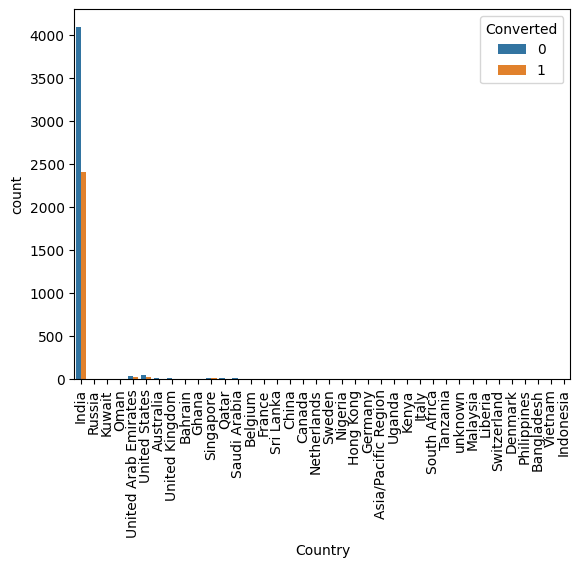

In [52]:
# Visualizing the country column

axs = sns.countplot(x = "Country" , hue = 'Converted', data = leads)
axs.set_xticklabels(axs.get_xticklabels(),rotation=90)
plt.show()

In [53]:
# Since Majority of values are India so we can drop it

columns_to_drop.append('Country')

In [54]:
# Checking for City Column

leads['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [90]:
leads['City'] = leads['City'].replace(np.nan,'Mumbai')


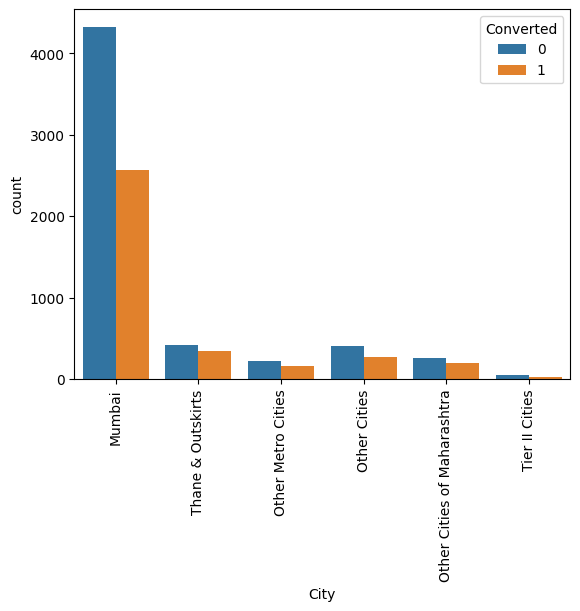

In [91]:
# Visualizing the City Column

axs = sns.countplot(x="City", hue="Converted",data = leads)
axs.set_xticklabels(axs.get_xticklabels(),rotation=90)
plt.show()

In [57]:
# Checking for Lead Source column

leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [59]:
# Converting 'google' to 'Google'

leads['Lead Source'] = leads['Lead Source'].replace('google','Google')

In [60]:
# Creating a category called 'Others'

leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release','youtubechannel',
                                                     'welearnblog_Home','WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM',np.nan] ,'Others')      

In [62]:
# Renaming Facebook Category to Socail Media

leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')

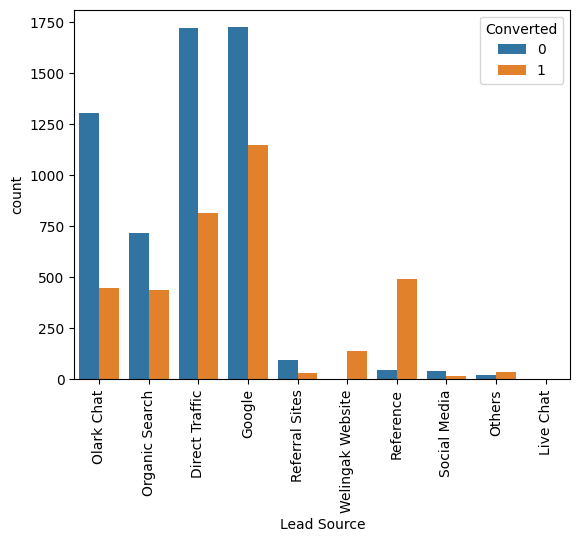

In [63]:
# Visualizing the Lead Source Column

axs = sns.countplot(x="Lead Source", hue="Converted",data = leads)
axs.set_xticklabels(axs.get_xticklabels(),rotation=90)
plt.show()

In [64]:
# Checking for Do Not Email column

leads['Do Not Email'].value_counts(dropna=False)

No     8506
Yes     734
Name: Do Not Email, dtype: int64

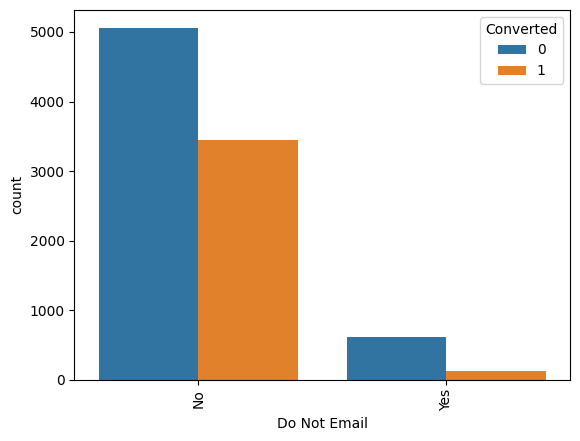

In [65]:
# Visualizing Do Not Email Column

axs = sns.countplot(x="Do Not Email", hue="Converted",data = leads)
axs.set_xticklabels(axs.get_xticklabels(),rotation=90)
plt.show()

In [66]:
# Checking for Do Not Call column

leads['Do Not Call'].value_counts(dropna=False)

No     9238
Yes       2
Name: Do Not Call, dtype: int64

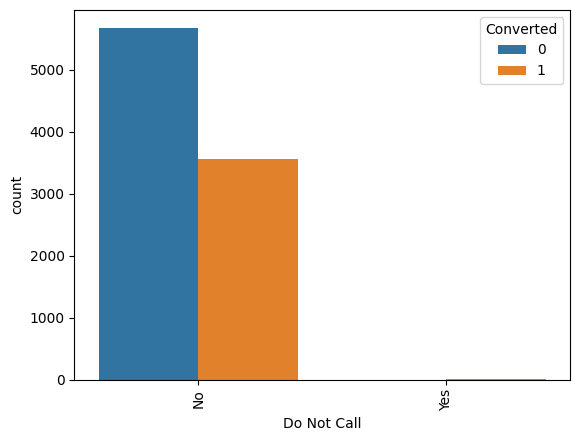

In [67]:
# Visualizing Do Not Call Column

axs = sns.countplot(x="Do Not Call", hue="Converted",data = leads)
axs.set_xticklabels(axs.get_xticklabels(),rotation=90)
plt.show()

In [68]:
# Adding Do Not Call column to drop it later

columns_to_drop.append('Do Not Call')

In [83]:
#checking value counts of Specialization column

leads['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [84]:
 #So we will replace NaN values here with 'Not Specified'

leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Not Specified')

In [88]:
#combining Management Specializations because they show similar trends

leads['Specialization'] = leads['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management')  

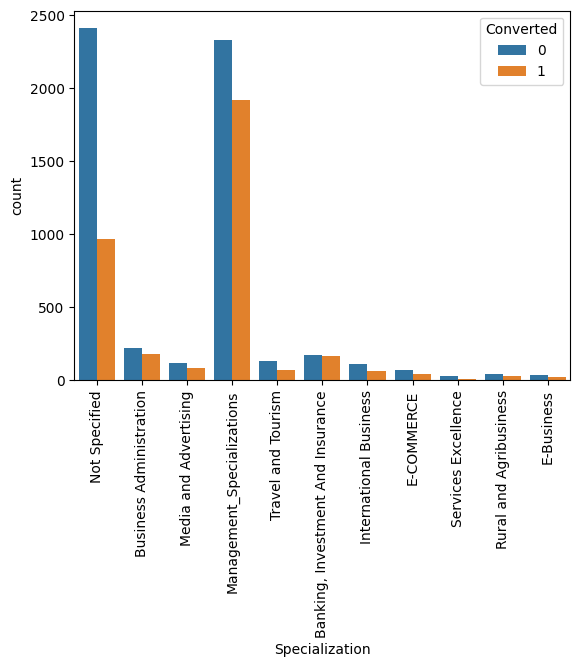

In [89]:
# Visualizing Specialization

axs = sns.countplot(x="Specialization", hue="Converted",data = leads)
axs.set_xticklabels(axs.get_xticklabels(),rotation=90)
plt.show()

In [92]:
#What is your current occupation

leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [93]:
#imputing Nan values with mode "Unemployed"

leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')

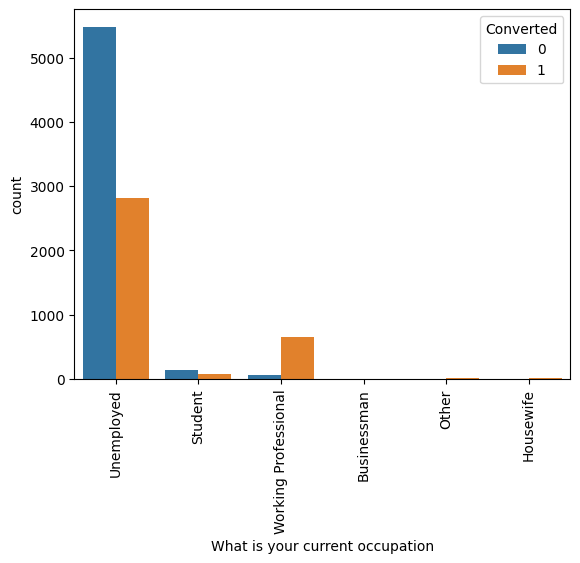

In [94]:
# Visualizing What is your current occupation

axs = sns.countplot(x="What is your current occupation", hue="Converted",data = leads)
axs.set_xticklabels(axs.get_xticklabels(),rotation=90)
plt.show()

In [95]:
#checking value counts

leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [97]:
#replacing Nan values with Mode "Better Career Prospects"

leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(
    np.nan,'Better Career Prospects')

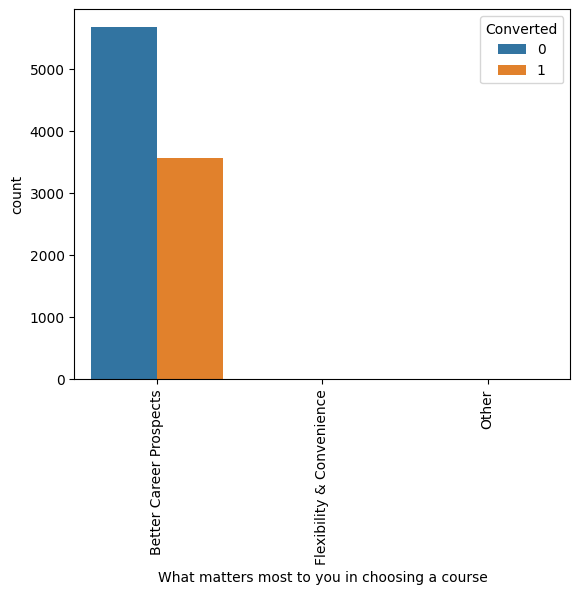

In [100]:
# Visualizing What matters most to you in choosing a course
axs = sns.countplot(x="What matters most to you in choosing a course", hue="Converted",data = leads)
axs.set_xticklabels(axs.get_xticklabels(),rotation=90)
plt.show()

In [101]:
columns_to_drop.append('What matters most to you in choosing a course')

In [102]:
#checking value counts of Tag variable
leads['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [103]:
#replacing Nan values with "Not Specified"
leads['Tags'] = leads['Tags'].replace(np.nan,'Not Specified')

In [116]:
leads['Tags'] = leads['Tags'].replace(['number not provided','in touch with EINS','Lost to Others','Still Thinking',
                 'Want to take admission but has financial problems','In confusion whether part time or DLP',
                 'Interested in Next batch','Lateral student','Shall take in the next coming month',
                 'University not recognized','Recognition issue (DEC approval)','wrong number given',
                                      'opp hangup'],'Other')

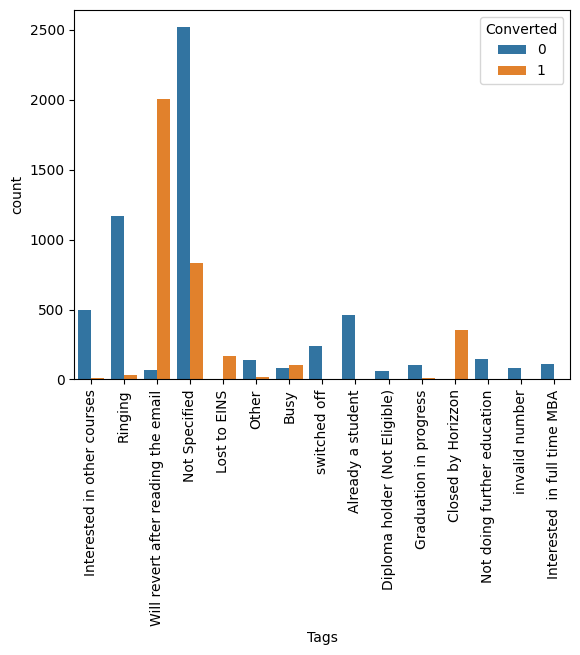

In [117]:
# Visualizing Tags
axs = sns.countplot(x="Tags", hue="Converted",data = leads)
axs.set_xticklabels(axs.get_xticklabels(),rotation=90)
plt.show()